In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("C:\\Users\\A7\\Desktop\\students-performance\\StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
616,female,group E,bachelor's degree,standard,none,37,45,38
348,male,group D,high school,free/reduced,none,75,74,66
998,female,group D,some college,standard,completed,68,78,77
487,female,group C,associate's degree,free/reduced,none,60,75,74
246,male,group E,associate's degree,standard,none,89,76,74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
passmark = 50
df.rename(columns = {"math score":"math_score",
                     "reading score":"reading_score",
                     "writing score":"writing_score",
                     "race/ethnicity":"group"},inplace = True)

In [7]:
df["percentage"] = round((df["math_score"]+df["reading_score"]+df["writing_score"]) / 3,2 )
df.head(3)

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67


In [8]:
df["percentage"].mean()

67.77058000000002

In [9]:
def Grade(percentage):
    if (percentage >= 96): return "Outstanding"
    if (percentage >= 86): return "Very Good"
    if (percentage >= 76): return "Good"
    if (percentage >= 65): return "Avarege"
    if (percentage >= 55): return "Sufficient"
    if (percentage >= 50): return "Passable"
    if (percentage < 50) : return "Fail"

In [10]:
df["grade"] = df.apply(lambda i: Grade(i["percentage"]), axis=1)

In [11]:
df.sample(5)

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage,grade
163,male,group C,high school,standard,none,52,53,49,51.33,Passable
881,female,group E,bachelor's degree,standard,completed,71,70,70,70.33,Avarege
712,female,group D,some college,standard,none,98,100,99,99.00,Outstanding
975,female,group C,some college,standard,completed,64,82,77,74.33,Avarege
871,female,group C,some college,standard,completed,70,72,76,72.67,Avarege


In [12]:
df.gender.value_counts()  # df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
df.group.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

(-1.1619508613271985,
 1.1686918297657398,
 -1.112525529828027,
 1.1035569495614768)

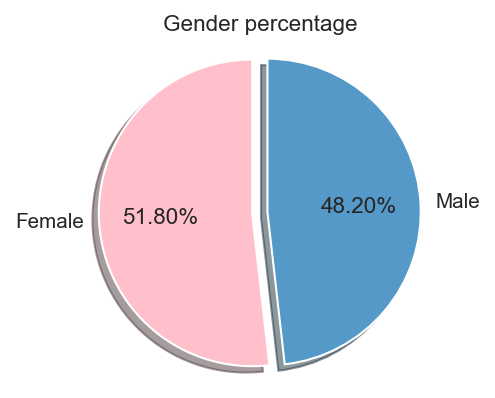

In [144]:
plt.figure(figsize=(3,3) , dpi=150)
plt.pie(x=df["gender"].value_counts(), labels=["Female","Male"],
        shadow=True, colors=["#FFC0CB","#5499C7"],
        autopct='%1.2f%%',startangle=90, explode=[0.05,0.05])
plt.title("Gender percentage")
plt.axis("equal")

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Grade')]

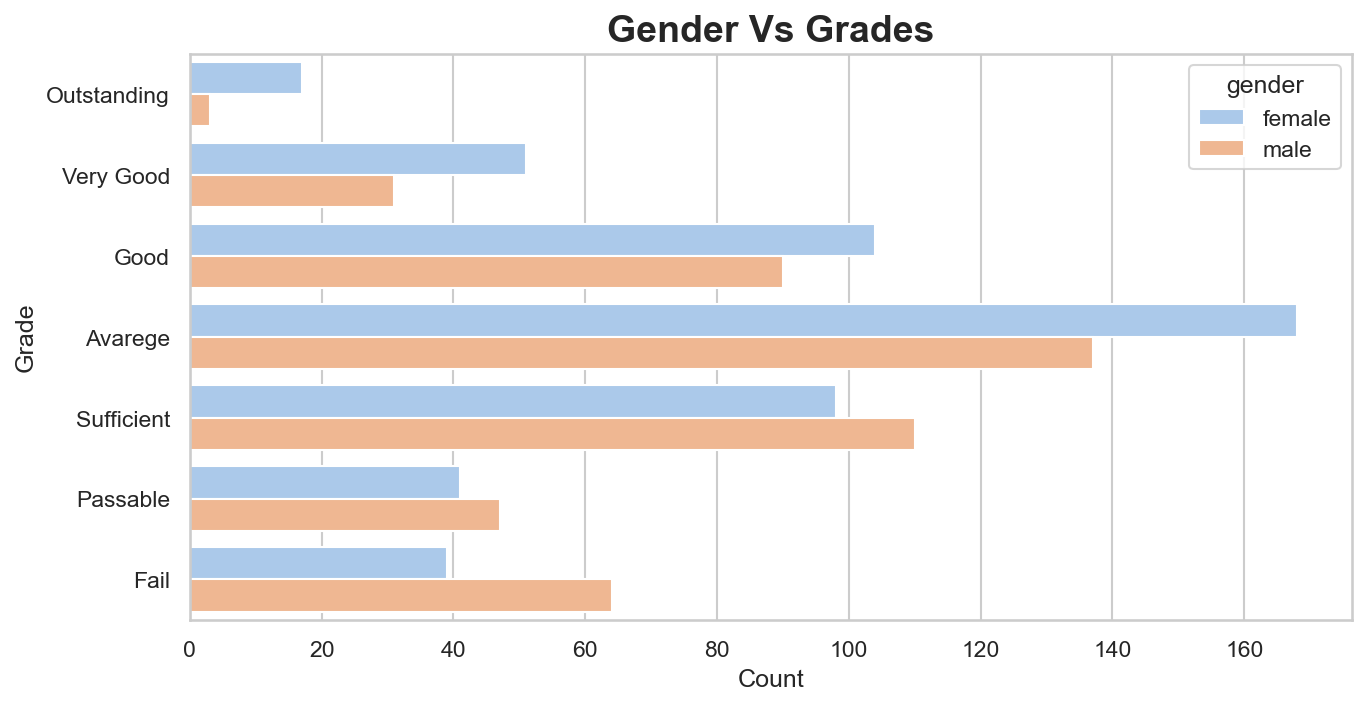

In [15]:
order = ["Outstanding","Very Good","Good","Avarege","Sufficient","Passable","Fail"]
sns.set_palette("pastel")
plt.figure(figsize=(10,5), dpi = 150)
axes=sns.countplot(y = df["grade"], data=df,hue=df["gender"],order=order )
plt.title("Gender Vs Grades" , fontsize=18 , fontweight="bold")
axes.set(xlabel="Count", ylabel="Grade")

<AxesSubplot:>

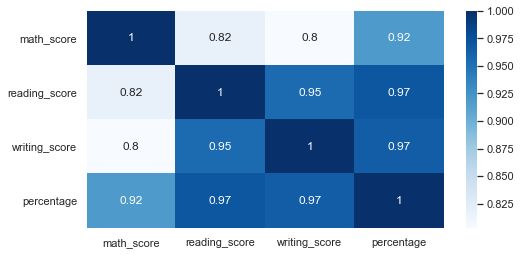

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap="Blues", annot=True)
#plt.xticks(rotation=60)

Text(0.5, 1.0, 'Score Kde Plot')

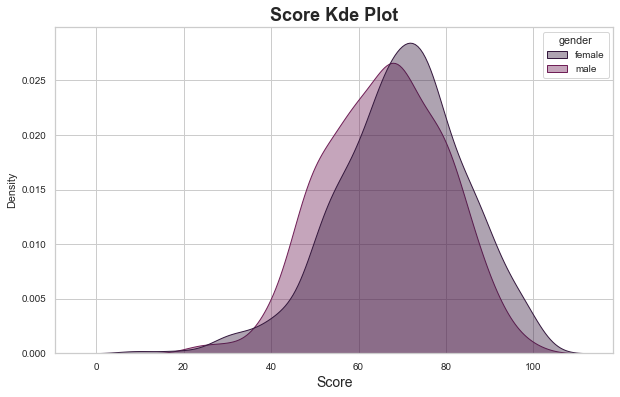

In [94]:
#A density plot is a representation of the distribution of a numeric variable
plt.figure(figsize=(10,6))
sns.set_palette("rocket")
sns.kdeplot(data=df,x =df["percentage"], hue=df["gender"], fill=True,alpha=.4,linewidth=1,common_norm=False)
plt.xlabel("Score", fontsize=14)
plt.title("Score Kde Plot" , fontsize=18, fontweight="bold")

Text(1.0, 1.25, 'Percentage and Mathematics score vs Gender')

<Figure size 576x288 with 0 Axes>

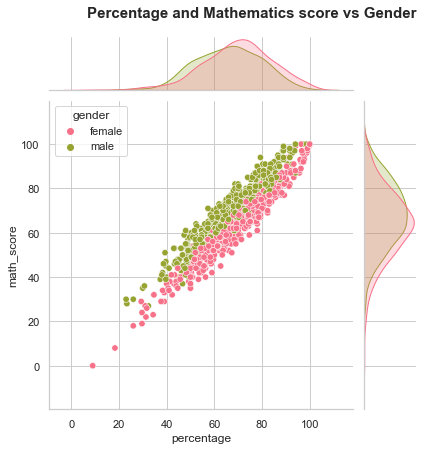

In [47]:
plt.figure(figsize=(8,4))
sns.set_palette("husl",4)
sns.jointplot(data=df,x="percentage", y = "math_score"
                ,marker ="o" ,s= 40,hue=df["gender"])
plt.title('Percentage and Mathematics score vs Gender', fontsize=15,
          fontweight='bold',y=1.25,loc="right")

Text(1.0, 1.3, 'Reading and Mathematics score vs Groups')

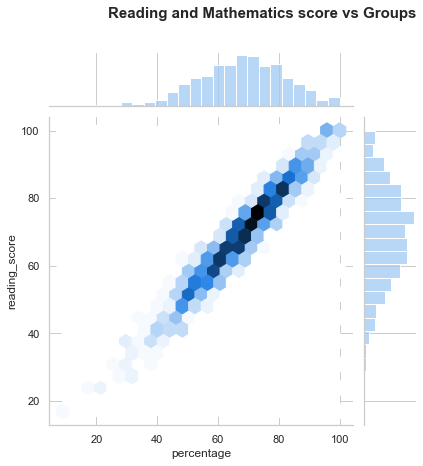

In [41]:
sns.jointplot(data=df,x="percentage",y="reading_score",
            palette="tab10",kind="hex")
plt.title('Reading and Mathematics score vs Groups', fontsize=15,
          fontweight='bold',y=1.3,loc="right")

Text(0.5, 0, 'percentage')

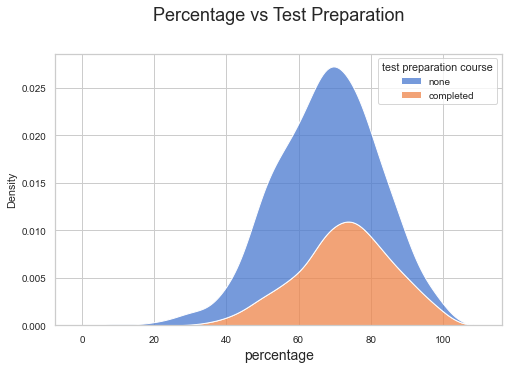

In [69]:
plt.figure(figsize=(8,5))
sns.set_context(context="notebook",font_scale=.9)
sns.set_palette("muted")
sns.kdeplot(data=df,x=df["percentage"],hue=df["test preparation course"],multiple="stack")
plt.title("Percentage vs Test Preparation" , fontsize=18,y=1.1)
plt.xlabel("percentage" , fontsize=14)

Text(0.5, 1.05, 'Percentage vs Parental Level Of Education')

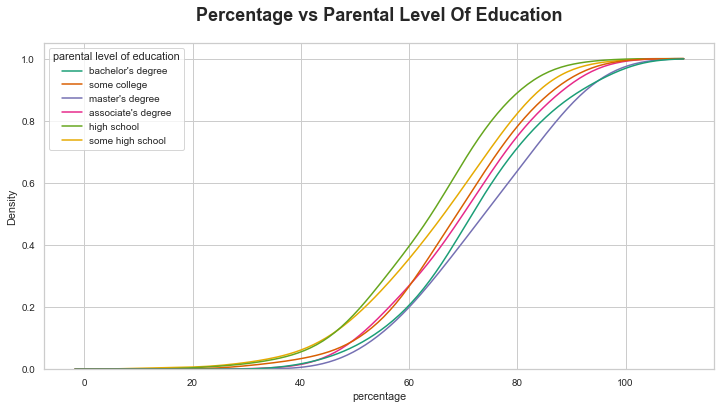

In [107]:
sns.set_palette("Dark2")
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x=df["percentage"] , 
            hue=df["parental level of education"],cumulative=True,common_grid=True, common_norm=False)
plt.title('Percentage vs Parental Level Of Education',fontdict={"fontsize":18,"fontweight":"bold"}, y =1.05)

Text(0, 0.5, 'Percentage')

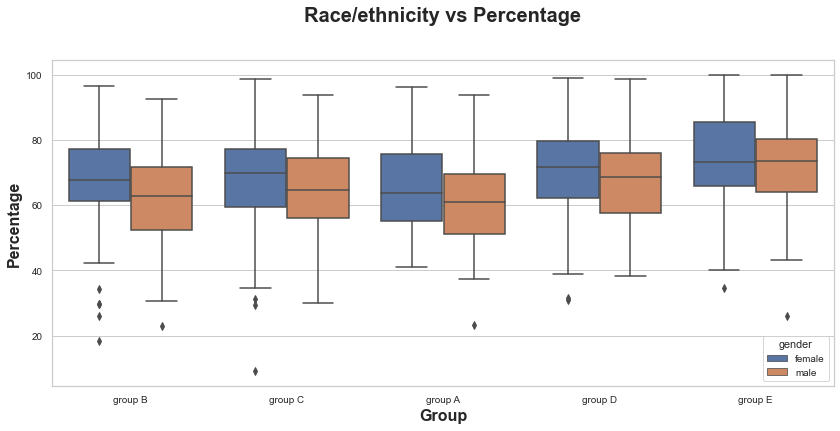

In [139]:
plt.figure(figsize=(14,6))
sns.set_palette("deep")
sns.boxplot(x=df["group"], y=df["percentage"],data=df, hue=df["gender"])
plt.title('Race/ethnicity vs Percentage',fontsize=20,y=1.1,fontweight="bold")
plt.xlabel("Group",fontsize=16,fontweight="bold")
plt.ylabel("Percentage",fontsize=16,fontweight="bold")


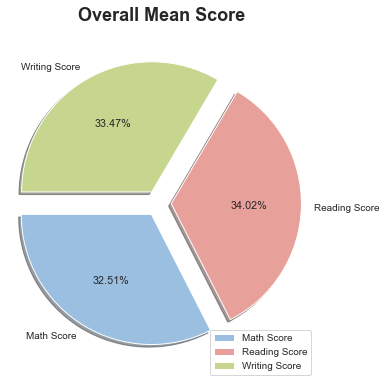

In [180]:
plt.figure(figsize=(5.5,5.5))
x = [df["math_score"].mean(),df["reading_score"].mean(),df["writing_score"].mean()]
plt.pie(x=x,labels=["Math Score","Reading Score","Writing Score"],
        shadow=True,colors=["#9BBFE0","#E8A09A","#C6D68F"] , explode=[.1,.1,.1],startangle=180,
       autopct = '%1.2f%%')
plt.axis("equal")
plt.title("Overall Mean Score", fontsize = 18,fontweight="bold" )
plt.legend(loc="lower right")
plt.tight_layout();